# Task: Predict Restaurant Ratings

## Goal
Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

## Steps:
<ol type = '1'>
 <li>Preprocess the dataset by handling missing values,encoding categorical variables, and splitting the data into training and testing sets.</li>
 <li>Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.</li>
 <li>Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared)on the testing data.</li>
 <li>Interpret the model's results and analyze the most influential features affecting restaurant ratings.</li>
</ol>                                                                                                            

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

#### To read a CSV file

In [6]:
df1 = pd.read_csv("/Users/chiragbathla/Downloads/PIET/Internship/Cognifyz internship/Dataset .csv")
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df1.shape

(9551, 21)

In [8]:
df1.groupby('Country Code')['Country Code'].agg('count')

Country Code
1      8652
14       24
30       60
37        4
94       21
148      40
162      22
166      20
184      20
189      60
191      20
208      34
214      60
215      80
216     434
Name: Country Code, dtype: int64

In [9]:
df1.groupby('Locality')['Locality'].agg('count')

Locality
 ILD Trade Centre Mall, Sohna Road     2
12th Square Building, Banjara Hills    1
A Hotel, Gurdev Nagar                  1
ARSS Mall, Paschim Vihar               1
Aaya Nagar                             1
                                      ..
ibis New Delhi, Aerocity               2
�ayyolu                                1
�guas Claras                           3
�ukurambar                             1
��mitk�_y                              1
Name: Locality, Length: 1208, dtype: int64

#### Data Cleaning Process

In [11]:
df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df2 = df1.dropna()
df2.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
df2.shape

(9542, 21)

In [14]:
#dropping features that are not required
df2 = df2.drop('Restaurant ID', axis=1)
df2 = df2.drop('Restaurant Name', axis=1)
df2 = df2.drop('Country Code', axis=1)
df2 = df2.drop('City', axis=1)
df2 = df2.drop('Address', axis=1)
df2 = df2.drop('Locality', axis=1)
df2 = df2.drop('Locality Verbose',axis=1)
df2 = df2.drop('Longitude',axis=1)
df2 = df2.drop('Latitude', axis=1)
df2 = df2.drop('Cuisines', axis=1)
df2 = df2.drop('Currency', axis=1)

In [15]:
df2.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,4000,Yes,No,No,No,4,4.4,Green,Very Good,270
3,1500,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,1500,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Creating label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
df2['Has Table booking'] = LabelEncoder().fit_transform(df2['Has Table booking'])
df2['Has Online delivery'] = LabelEncoder().fit_transform(df2['Has Online delivery'])
df2['Is delivering now'] = LabelEncoder().fit_transform(df2['Is delivering now'])
df2['Switch to order menu'] = LabelEncoder().fit_transform(df2['Switch to order menu'])
df2['Rating color'] = LabelEncoder().fit_transform(df2['Rating color'])
df2['Rating text'] = LabelEncoder().fit_transform(df2['Rating text'])

In [18]:
df2

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1100,1,0,0,0,3,4.8,0,1,314
1,1200,1,0,0,0,3,4.5,0,1,591
2,4000,1,0,0,0,4,4.4,1,5,270
3,1500,0,0,0,0,4,4.9,0,1,365
4,1500,1,0,0,0,4,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,1,5,788
9547,105,0,0,0,0,3,4.2,1,5,1034
9548,170,0,0,0,0,4,3.7,5,2,661
9549,120,0,0,0,0,4,4.0,1,5,901


In [19]:
df2.shape

(9542, 10)

In [20]:
df2.describe()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9542.000000,9542.000000,9542.000000,9542.000000,9542.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,1200.326137,0.121358,0.256864,0.003563,0.0,1.804968,2.665238,2.952840,1.788933,156.772060
std,16128.743876,0.326560,0.436927,0.059589,0.0,0.905563,1.516588,1.492629,1.694795,430.203324
min,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,250.000000,0.000000,0.000000,0.000000,0.0,1.000000,2.500000,2.000000,0.000000,5.000000
50%,400.000000,0.000000,0.000000,0.000000,0.0,2.000000,3.200000,2.000000,2.000000,31.000000
75%,700.000000,0.000000,1.000000,0.000000,0.0,2.000000,3.700000,4.000000,3.000000,130.000000
max,800000.000000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,5.000000,5.000000,10934.000000


<Axes: xlabel='Aggregate rating', ylabel='Count'>

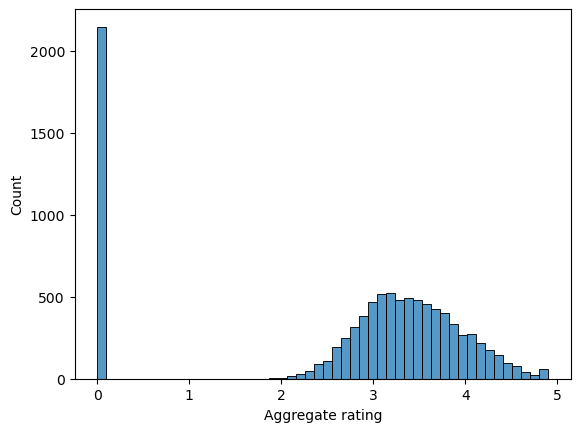

In [21]:
sns.histplot(df2['Aggregate rating'], bins=50)

Text(0.5, 1.0, 'Votes vs Aggregate Rating')

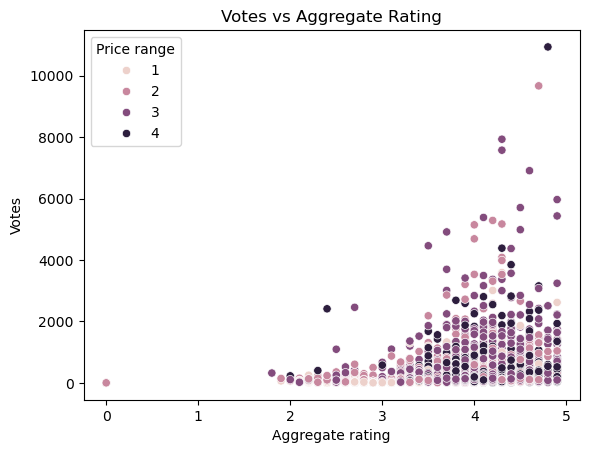

In [22]:
sns.scatterplot(data = df2, y = 'Votes', x ='Aggregate rating', hue = 'Price range')
plt.title("Votes vs Aggregate Rating")

Text(0.5, 1.0, 'Correlation between the attributes')

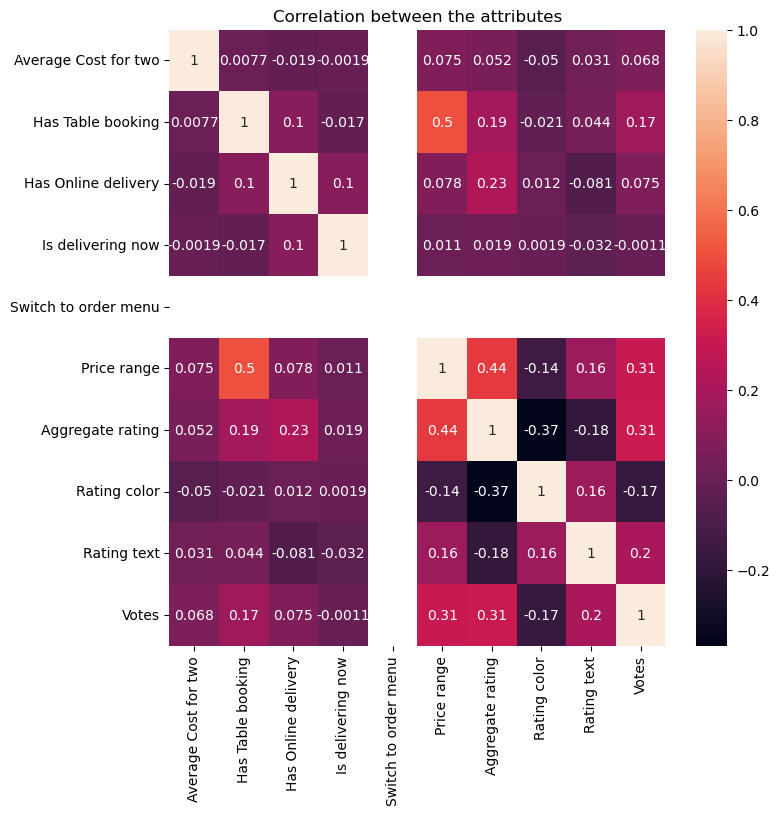

In [23]:
plt.figure(figsize = (8, 8))
sns.heatmap(df2.corr(), annot = True)
plt.title('Correlation between the attributes')

<h2 style = 'color: blue'>Building models</h2>

In [25]:
x = df2.drop('Aggregate rating', axis = 1)
y = df2['Aggregate rating']

In [26]:
# Split the dataset into two: 70% as the training set and 30% as the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (6679, 9)
the shape of the training set (target) is: (6679,)

the shape of the test set (input) is: (2863, 9)
the shape of the test set (target) is: (2863,)


<h4 style = 'color:blue'> 1. Linear Regression model</h4>

In [28]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [29]:
linearRegr_pred = linear_model.predict(x_test)

##### Evaluating the Linear Regression model

In [31]:
linearRegr_mae = mean_absolute_error(y_test, linearRegr_pred)
linearRegr_mse = mean_squared_error(y_test, linearRegr_pred)
linearRegr_rmse = np.sqrt(linearRegr_mse)
linearRegr_r2 = r2_score(y_test,linearRegr_pred)

print(f"MAE of the linear regression model is: {linearRegr_mae:.2f}")
print(f"MSE of the linear regression model is: {linearRegr_mse:.2f}")
print(f"RMSE of the linear regression model is: {linearRegr_rmse:.2f}")
print(f"R2 score of the linear regression model is: {linearRegr_r2:.2f}")

MAE of the linear regression model is: 0.97
MSE of the linear regression model is: 1.37
RMSE of the linear regression model is: 1.17
R2 score of the linear regression model is: 0.39


<h4 style = 'color:blue'> 2. Decision Tree Regression model</h4>

In [33]:
dtree_model = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 10, random_state = 1)
dtree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

In [34]:
dtree_pred = dtree_model.predict(x_test)

##### Evaluating the Decision Tree Regression model

In [36]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_rmse = np.sqrt(dtree_mse)
dtree_r2 = r2_score(y_test, dtree_pred)

print(f"MAE of the decision tree regression model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree regression model is: {dtree_mse:.2f}")
print(f"RMSE of the decision tree regression model is: {dtree_rmse:.2f}")
print(f"R2 score of the decision tree regression model is: {dtree_r2:.2f}")

MAE of the decision tree regression model is: 0.12
MSE of the decision tree regression model is: 0.03
RMSE of the decision tree regression model is: 0.17
R2 score of the decision tree regression model is: 0.99


#### Interpreting the model's results

##### 1. MAE (Mean Absolute Error) of 0.12 indicates that on average, the model is off by only 0.12 rating points.
##### 2. MSE of 0.03 indicates that the model's predictions are very accurate & low errors.
##### 3. RMSE (Root MSE) of 0.17 indicates that errors are small even when squared.
##### 4. R2 score of 0.99 signifies that the model explains 99% of the variation in the target variable and thus is highly effective in      explaining and predicting the target variable.
##### These values mean the Decision Tree Regression model is highly accurate and reliable for predicting restaurant ratings.

#### Checking that the model is not overfitting

In [40]:
y_train_pred = dtree_model.predict(x_train)
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, dtree_pred))

Train R²: 0.9870431424151532
Test R²: 0.9863189745792339


In [41]:
# Since the train and test r2 scores are nearly identical, so the model is not overfitting

##### Visualizing the Decision Tree

[Text(0.41964285714285715, 0.9166666666666666, 'Votes <= 3.5\nsquared_error = 2.33\nsamples = 6679\nvalue = 2.655'),
 Text(0.38392857142857145, 0.75, 'squared_error = 0.0\nsamples = 1527\nvalue = 0.0'),
 Text(0.45535714285714285, 0.75, 'Rating color <= 1.5\nsquared_error = 0.312\nsamples = 5152\nvalue = 3.442'),
 Text(0.19642857142857142, 0.5833333333333334, 'Rating color <= 0.5\nsquared_error = 0.063\nsamples = 988\nvalue = 4.277'),
 Text(0.10714285714285714, 0.4166666666666667, 'Average Cost for two <= 2650.0\nsquared_error = 0.023\nsamples = 219\nvalue = 4.668'),
 Text(0.07142857142857142, 0.25, 'Votes <= 96.0\nsquared_error = 0.022\nsamples = 208\nvalue = 4.661'),
 Text(0.03571428571428571, 0.08333333333333333, 'squared_error = 0.018\nsamples = 17\nvalue = 4.735'),
 Text(0.10714285714285714, 0.08333333333333333, 'squared_error = 0.022\nsamples = 191\nvalue = 4.654'),
 Text(0.14285714285714285, 0.25, 'squared_error = 0.023\nsamples = 11\nvalue = 4.791'),
 Text(0.2857142857142857, 0.

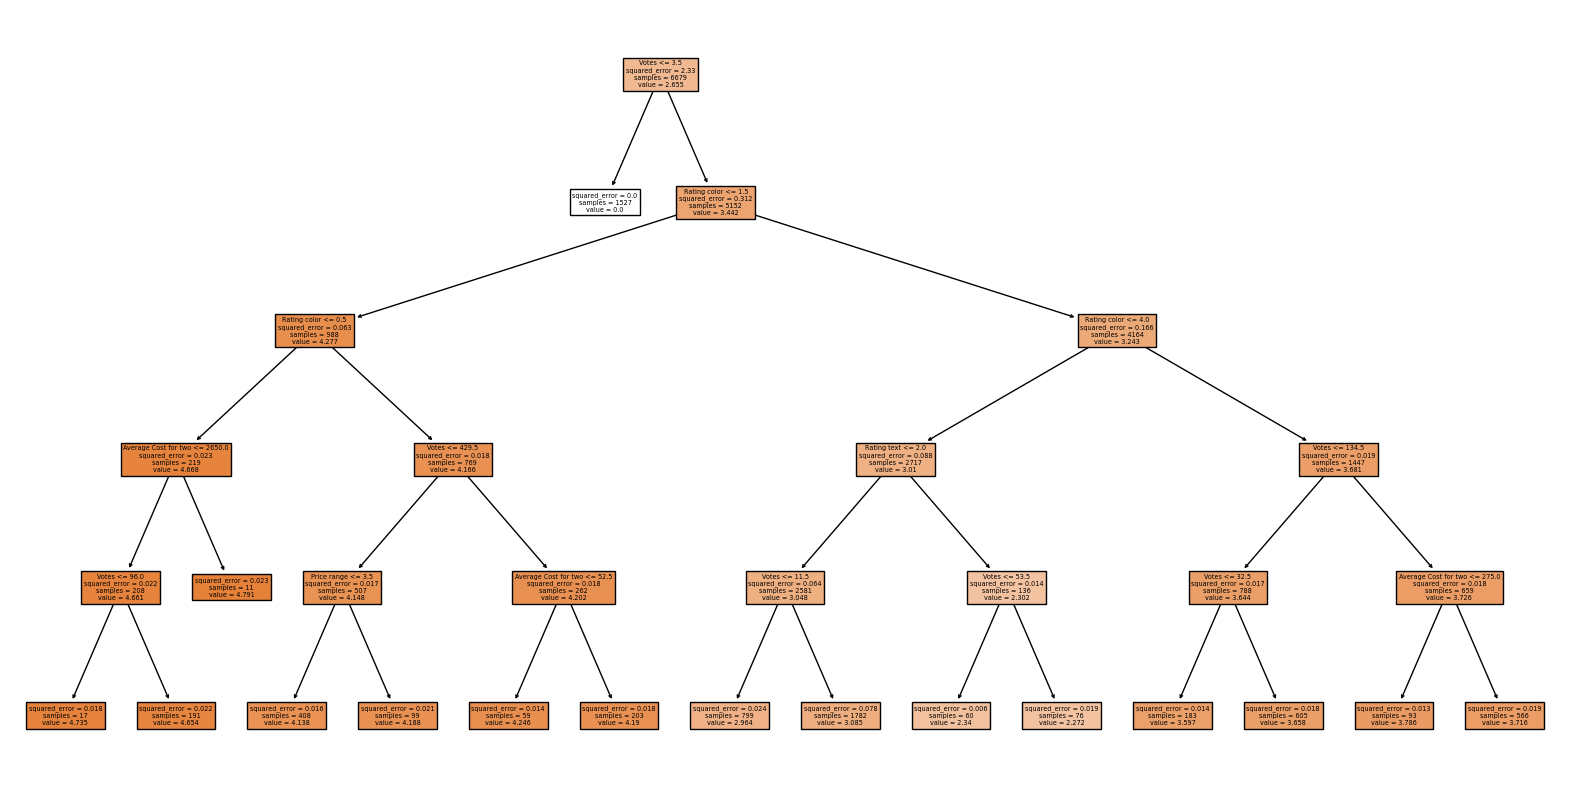

In [43]:
plt.figure(figsize=(20, 10))
plot_tree(dtree_model, feature_names = x.columns, filled = True)

#### Analyzing Feature Importance

In [45]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': dtree_model.feature_importances_}).sort_values(by = 'Importance',
                                                                                                                      ascending = False)

In [46]:
print(feature_importance.head())

                Feature  Importance
8                 Votes    0.909229
6          Rating color    0.086038
7           Rating text    0.004674
0  Average Cost for two    0.000046
5           Price range    0.000013


#### Analyzing the most influential features

##### 1. The number of votes a restaurant receives is highly predictive of its rating.
##### 2. Visual/textual rating descriptors have minor impact on the target variable(Aggregate rating)
##### 3. Pricing does not significantly impact the rating prediction in this dataset.